# EDA - Prediciendo la diabetes

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from xgboost import XGBClassifier

# 1. Problem statement and data collection

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# 2. Exploration and data cleaning
# 2.1 Understanding the features:

- Pregnancies - Número de embarazos del paciente -> n
- Glucose - Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa -> n
- BloodPressure - Presión arterial diastólica (medida en mm Hg) -> n
- SkinThickness - Grosor del pliegue cutáneo del tríceps (medida en mm) -> n
- Insulin - Insulina sérica de 2 horas (medida en mu U/ml) -> n
- BMI - Índice de masa corporal -> n
- DiabetesPedigreeFunction - Función de pedigrí de diabetes -> n
- Age - Edad del paciente -> n
- Outcome. **TARGET** - Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo -> n

* n - numerical

In [3]:
# Obtener las dimensiones
print('Our dataframe contains {} rows, indicating the total number of rentals, and has a shape of {}.'.format(len(total_data), total_data.shape))

Our dataframe contains 768 rows, indicating the total number of rentals, and has a shape of (768, 9).


In [4]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 2.2 Identifying Null Values and data types for each feature

In [5]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

# 2.3 Looking for duplicated and dropping them, if any.

In [6]:
#Eliminamos los duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3. Numerical Variable Analysis

In [7]:
#Analizamos los tipos de información que tenemos
total_data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

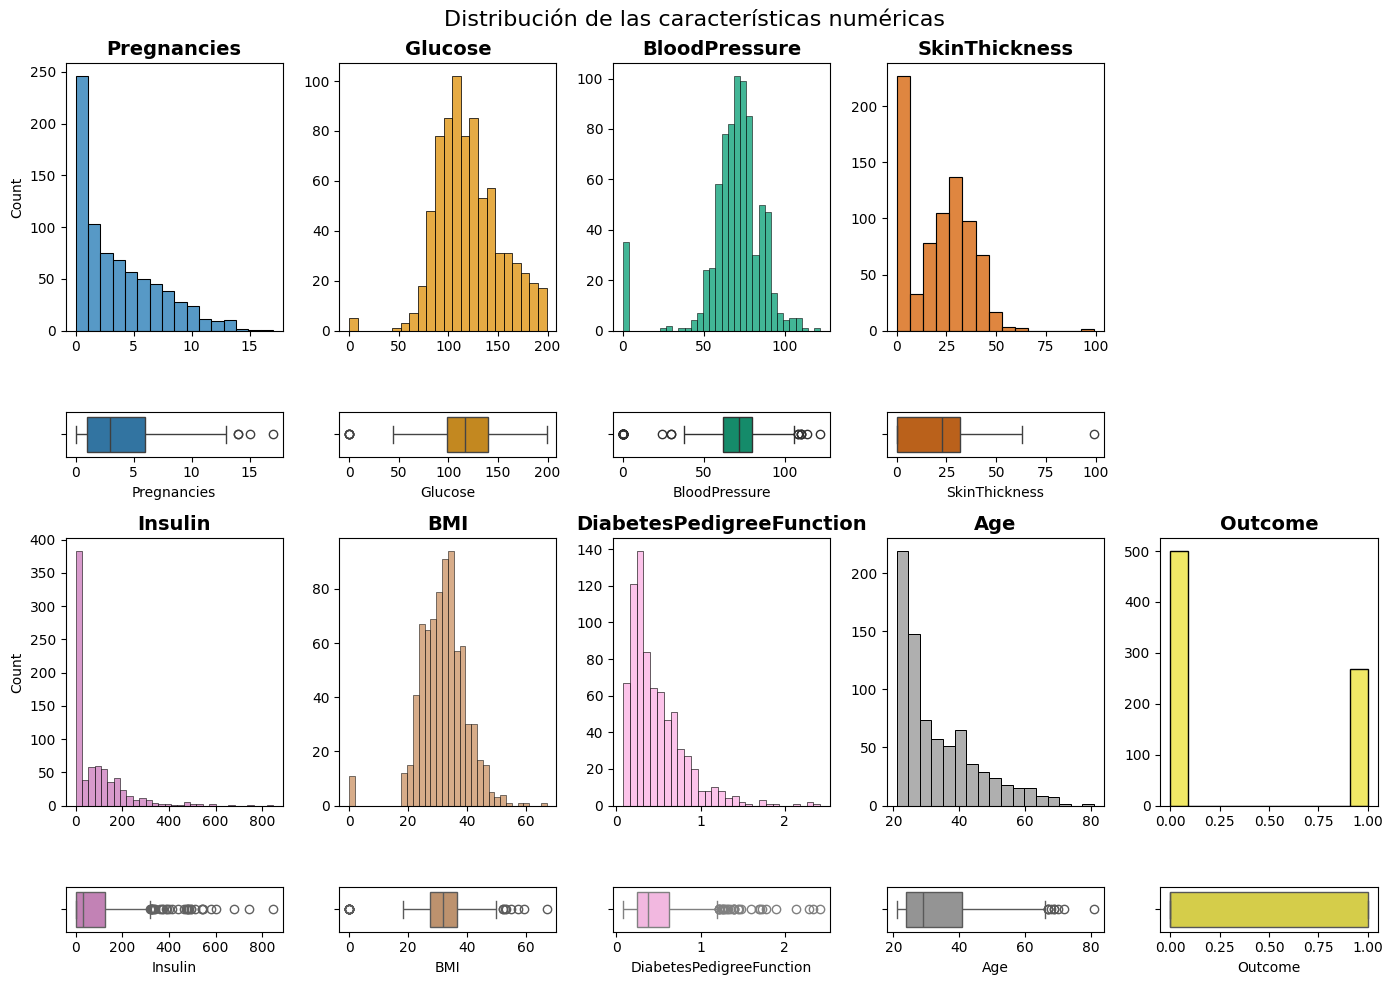

In [8]:
#Analisis con histogramas y boxplot de las características numéricas
fig, axis = plt.subplots(4, 5, figsize = (14, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[0, 2], data = total_data, x = "BloodPressure", color=sns.color_palette("colorblind")[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "BloodPressure", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[0, 3], data = total_data, x = "SkinThickness", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "SkinThickness", color=sns.color_palette("colorblind")[3])

sns.histplot(ax = axis[2, 0], data = total_data, x = "Insulin", color=sns.color_palette("colorblind")[4]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "Insulin", color=sns.color_palette("colorblind")[4])

sns.histplot(ax = axis[2, 1], data = total_data, x = "BMI", color=sns.color_palette("colorblind")[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "BMI", color=sns.color_palette("colorblind")[5])

sns.histplot(ax = axis[2, 2], data = total_data, x = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[6]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[6])

sns.histplot(ax = axis[2, 3], data = total_data, x = "Age", color=sns.color_palette("colorblind")[7]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = total_data, x = "Age", color=sns.color_palette("colorblind")[7])

sns.histplot(ax = axis[2, 4], data = total_data, x = "Outcome", color=sns.color_palette("colorblind")[8]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 4], data = total_data, x = "Outcome", color=sns.color_palette("colorblind")[8])

axis[0, 0].set_title("Pregnancies", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Glucose", fontsize=14, fontweight='bold')
axis[0, 2].set_title("BloodPressure", fontsize=14, fontweight='bold')
axis[0, 3].set_title("SkinThickness", fontsize=14, fontweight='bold')
axis[2, 0].set_title("Insulin", fontsize=14, fontweight='bold')
axis[2, 1].set_title("BMI", fontsize=14, fontweight='bold')
axis[2, 2].set_title("DiabetesPedigreeFunction", fontsize=14, fontweight='bold')
axis[2, 3].set_title("Age", fontsize=14, fontweight='bold')
axis[2, 4].set_title("Outcome", fontsize=14, fontweight='bold')

fig.delaxes(axis[0, 4])
fig.delaxes(axis[1, 4])

plt.tight_layout()
plt.show()

In [9]:
#Hacemos una copia del data frame con outliers
df_enc = total_data.copy()

# 4. Multivariate Analysis

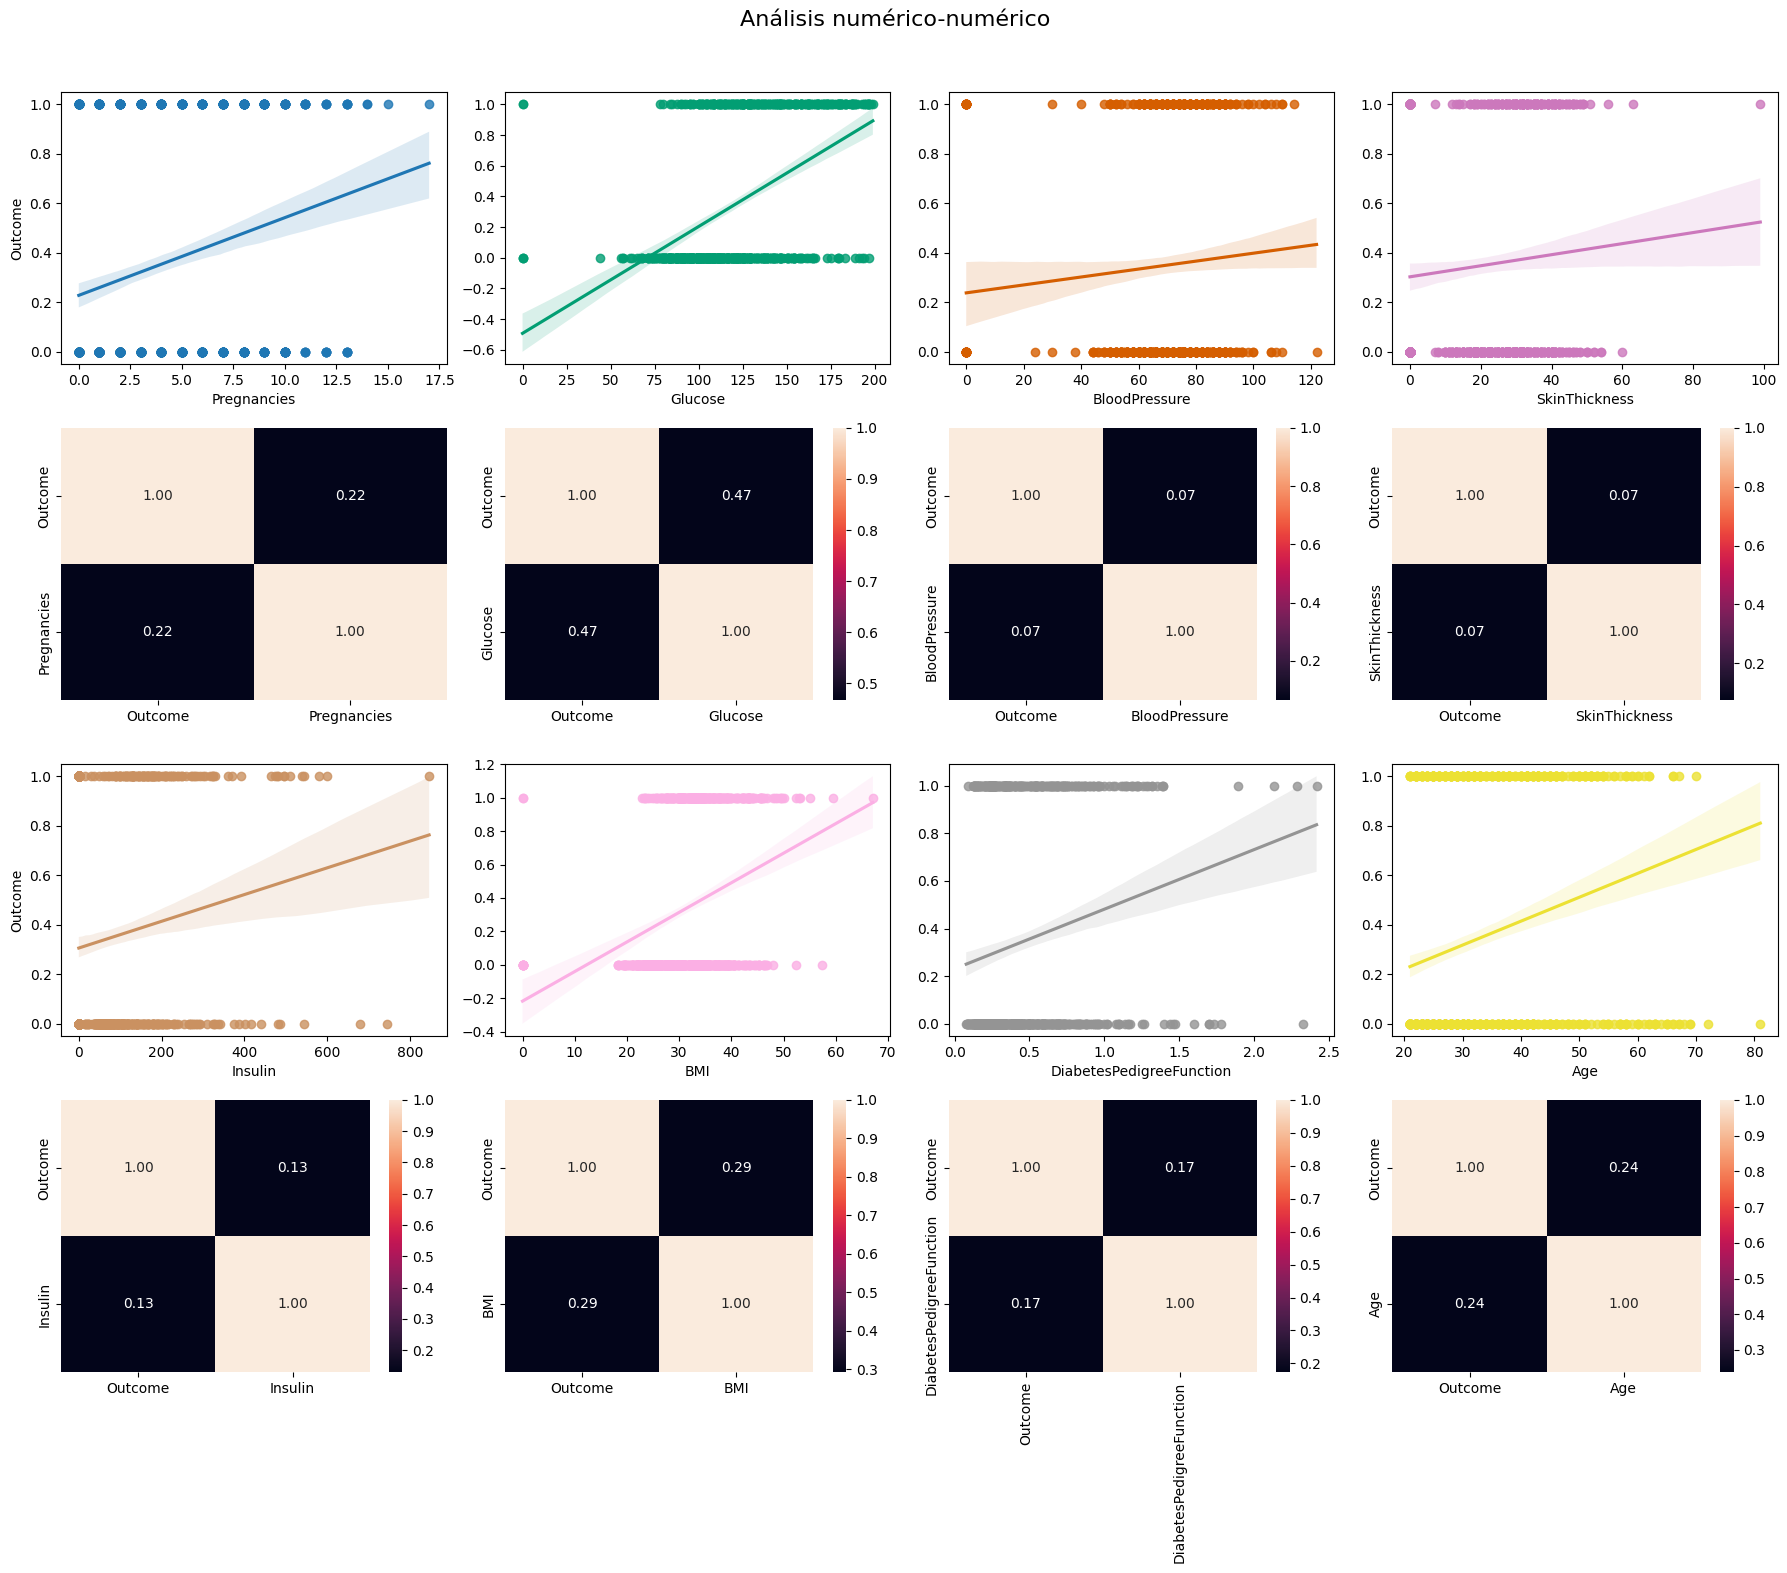

In [10]:
#Analisis de varias variables pt.2
fig, axis = plt.subplots(4, 4, figsize = (18, 16))
fig.suptitle("Análisis numérico-numérico", fontsize=16)

sns.regplot(ax = axis[0, 0], data = df_enc, x = "Pregnancies", y = "Outcome")
sns.heatmap(df_enc[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_enc, x = "Glucose", y = "Outcome", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df_enc, x = "BloodPressure", y = "Outcome", color=sns.color_palette("colorblind")[3]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[0, 3], data = df_enc, x = "SkinThickness", y = "Outcome", color=sns.color_palette("colorblind")[4]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = df_enc, x = "Insulin", y = "Outcome", color=sns.color_palette("colorblind")[5])
sns.heatmap(df_enc[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = df_enc, x = "BMI", y = "Outcome", color=sns.color_palette("colorblind")[6]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[2, 2], data = df_enc, x = "DiabetesPedigreeFunction", y = "Outcome", color=sns.color_palette("colorblind")[7]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)

sns.regplot(ax = axis[2, 3], data = df_enc, x = "Age", y = "Outcome", color=sns.color_palette("colorblind")[8]).set(ylabel = None)
sns.heatmap(df_enc[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 3]).set(ylabel = None)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 4.1 Correlation Analysis 

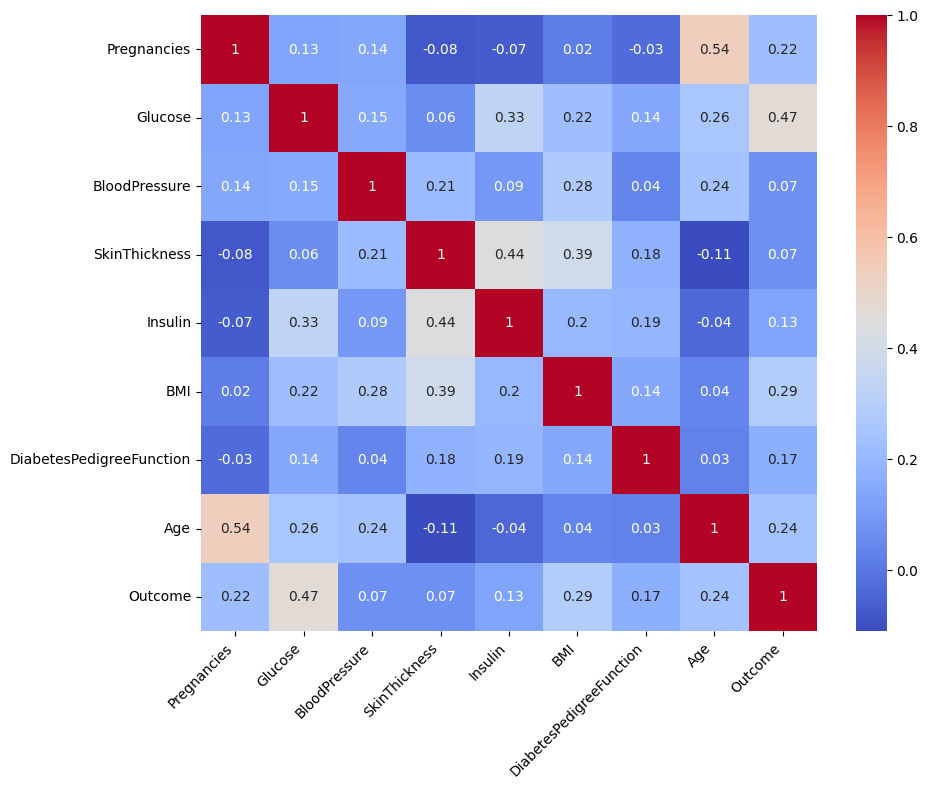

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_enc.corr().round(2), annot=True, cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
sns.pairplot(data=df_enc)
plt.show()

KeyboardInterrupt: 

# 5. Feature Engineering
# 5.1 Outlier Analysis

In [ ]:
#Análisis de outliers
df_enc.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


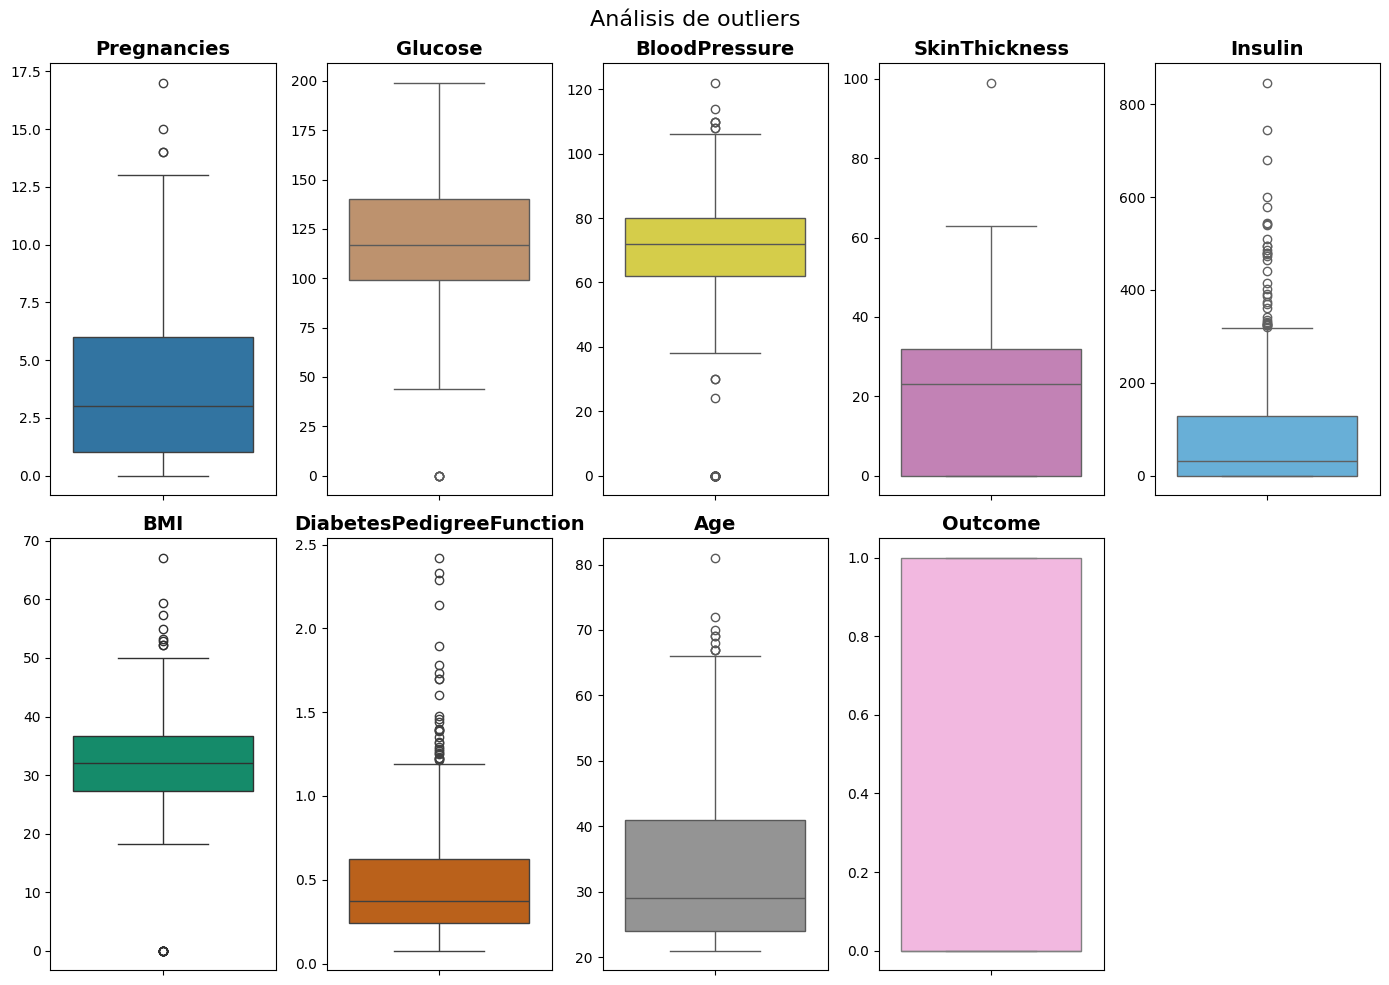

In [ ]:
fig, axes = plt.subplots(2, 5, figsize = (14, 10))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = df_enc, y = "Pregnancies").set_title("Pregnancies", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 1], data = df_enc, y = "Glucose", color=sns.color_palette("colorblind")[5]).set_title("Glucose", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 2], data = df_enc, y = "BloodPressure", color=sns.color_palette("colorblind")[8]).set_title("BloodPressure", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 3], data = df_enc, y = "SkinThickness", color=sns.color_palette("colorblind")[4]).set_title("SkinThickness", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[0, 4], data = df_enc, y = "Insulin", color=sns.color_palette("colorblind")[9]).set_title("Insulin", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 0], data = df_enc, y = "BMI", color=sns.color_palette("colorblind")[2]).set_title("BMI", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 1], data = df_enc, y = "DiabetesPedigreeFunction", color=sns.color_palette("colorblind")[3]).set_title("DiabetesPedigreeFunction", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 2], data = df_enc, y = "Age", color=sns.color_palette("colorblind")[7]).set_title("Age", fontsize=14, fontweight='bold')
sns.boxplot(ax = axes[1, 3], data = df_enc, y = "Outcome", color=sns.color_palette("colorblind")[6]).set_title("Outcome", fontsize=14, fontweight='bold')

for ax in axes.flatten():
    if ax: 
        ax.set(ylabel=None)

fig.delaxes(axes[1, 4])

plt.tight_layout()
plt.show()

In [ ]:
#Creamos una copia sin outliers
df_enc_no = df_enc.copy()

In [ ]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [ ]:
df_enc_no['Pregnancies'] = remove_outliers(df_enc_no['Pregnancies'], 'Pregnancies')
df_enc_no['Glucose'] = remove_outliers(df_enc_no['Glucose'], 'Glucose')
df_enc_no['SkinThickness'] = remove_outliers(df_enc_no['SkinThickness'], 'SkinThickness')
df_enc_no['BloodPressure'] = remove_outliers(df_enc_no['BloodPressure'], 'BloodPressure')
df_enc_no['Insulin'] = remove_outliers(df_enc_no['Insulin'], 'Insulin')
df_enc_no['BMI'] = remove_outliers(df_enc_no['BMI'], 'BMI')
df_enc_no['DiabetesPedigreeFunction'] = remove_outliers(df_enc_no['DiabetesPedigreeFunction'], 'DiabetesPedigreeFunction')
df_enc_no['Age'] = remove_outliers(df_enc_no['Age'], 'Age')

# 5.2 Missing Values

In [ ]:
df_enc.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 5.3 Split train/test of both Data Frames

In [ ]:
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [ ]:
#Dividimos el data frame original
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Outcome', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Outcome', df_enc_no)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# 5.4 Normalization

In [ ]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/interim/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [ ]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 5.5 Min-Max Scaling

In [ ]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [ ]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

# 6. Feature Selection

In [ ]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel 

In [ ]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 9, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 9, 'without_outliers')

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=9 is greater than n_features=8. All the features will be returned.
  warnings.warn(


# 6.1 Applying the filter to the normalized and minmax scaled data frames

In [ ]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

# 6.2 Saving the CSV files

In [ ]:
dfs_train = [X_train_with_outliers_sel, X_train_without_outliers_sel, 
             X_train_with_outliers_norm_sel, X_train_without_outliers_norm_sel, 
             X_train_with_outliers_minmax_sel, X_train_without_outliers_minmax_sel]

dfs_test = [X_test_with_outliers_sel, X_test_without_outliers_sel, 
            X_test_with_outliers_norm_sel, X_test_without_outliers_norm_sel, 
            X_test_with_outliers_minmax_sel, X_test_without_outliers_minmax_sel]

In [ ]:
# Data frame de entrenamiento
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# Data frame de prueba
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

# Machine Learning
# 1. Decision making: Which is the best dataset?

In [ ]:
# Train data frames
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# Test data frames
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

# Decision Tree

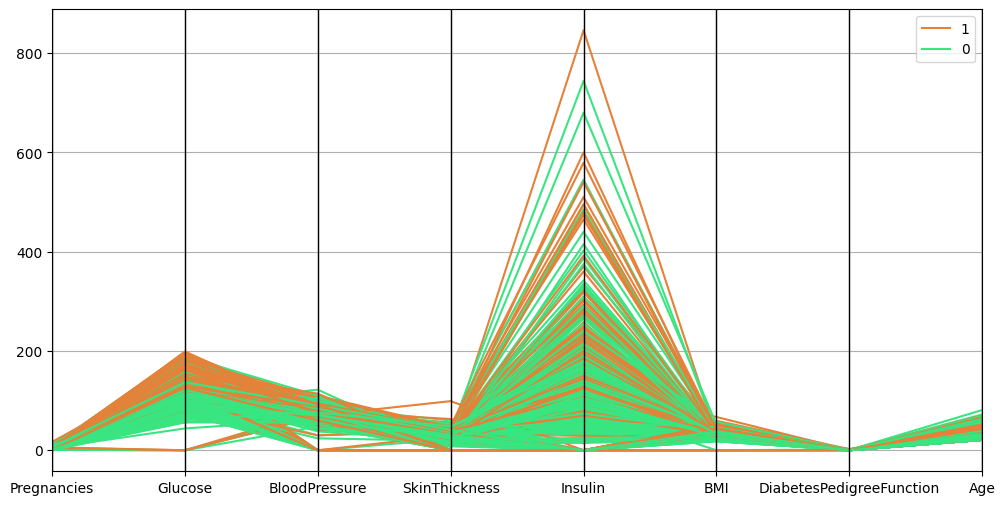

In [ ]:
#Visualizamos la relación entre las variables
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [ ]:
train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel,
  X_train_with_outliers_norm_sel,
  X_train_without_outliers_norm_sel,
  X_train_with_outliers_minmax_sel,
  X_train_without_outliers_minmax_sel
]
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel,
  X_test_with_outliers_norm_sel,
  X_test_without_outliers_norm_sel,
  X_test_with_outliers_minmax_sel,
  X_test_without_outliers_minmax_sel
]

results = []
models = []

for df_index in range(len(train_dfs)):
  model = DecisionTreeClassifier(random_state=42)
  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)
  y_train_pred = model.predict(train_df)
  y_test_pred = model.predict(test_dfs[df_index])

  results.append(
    {
        "index": df_index,
        "train_score": accuracy_score(y_train, y_train_pred),
        "test_score": accuracy_score(y_test, y_test_pred)
    }
  )
  models.append(model)
sorted(results, key = lambda x: x["train_score"], reverse = True)

[{'index': 0, 'train_score': 1.0, 'test_score': 0.7987012987012987},
 {'index': 1, 'train_score': 1.0, 'test_score': 0.7792207792207793},
 {'index': 2, 'train_score': 1.0, 'test_score': 0.7987012987012987},
 {'index': 3, 'train_score': 1.0, 'test_score': 0.7792207792207793},
 {'index': 4, 'train_score': 1.0, 'test_score': 0.7987012987012987},
 {'index': 5, 'train_score': 1.0, 'test_score': 0.7792207792207793}]

In [ ]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
tree_rules = export_text(models[0], feature_names = columns)
print(tree_rules)

|--- Glucose <= 143.50
|   |--- BMI <= 26.95
|   |   |--- BMI <= 26.35
|   |   |   |--- Age <= 59.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.68
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  59.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.34
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.34
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- SkinThickness <= 22.00
|   |   |   |   |--- class: 0
|   |   |   |--- SkinThickness >  22.00
|   |   |   |   |--- Pregnancies <= 2.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  2.00
|   |   |   |   |   |--- class: 1
|   |--- BMI >  26.95
|   |   |--- Glucose <= 107.50
|   |   |   |--- Dia

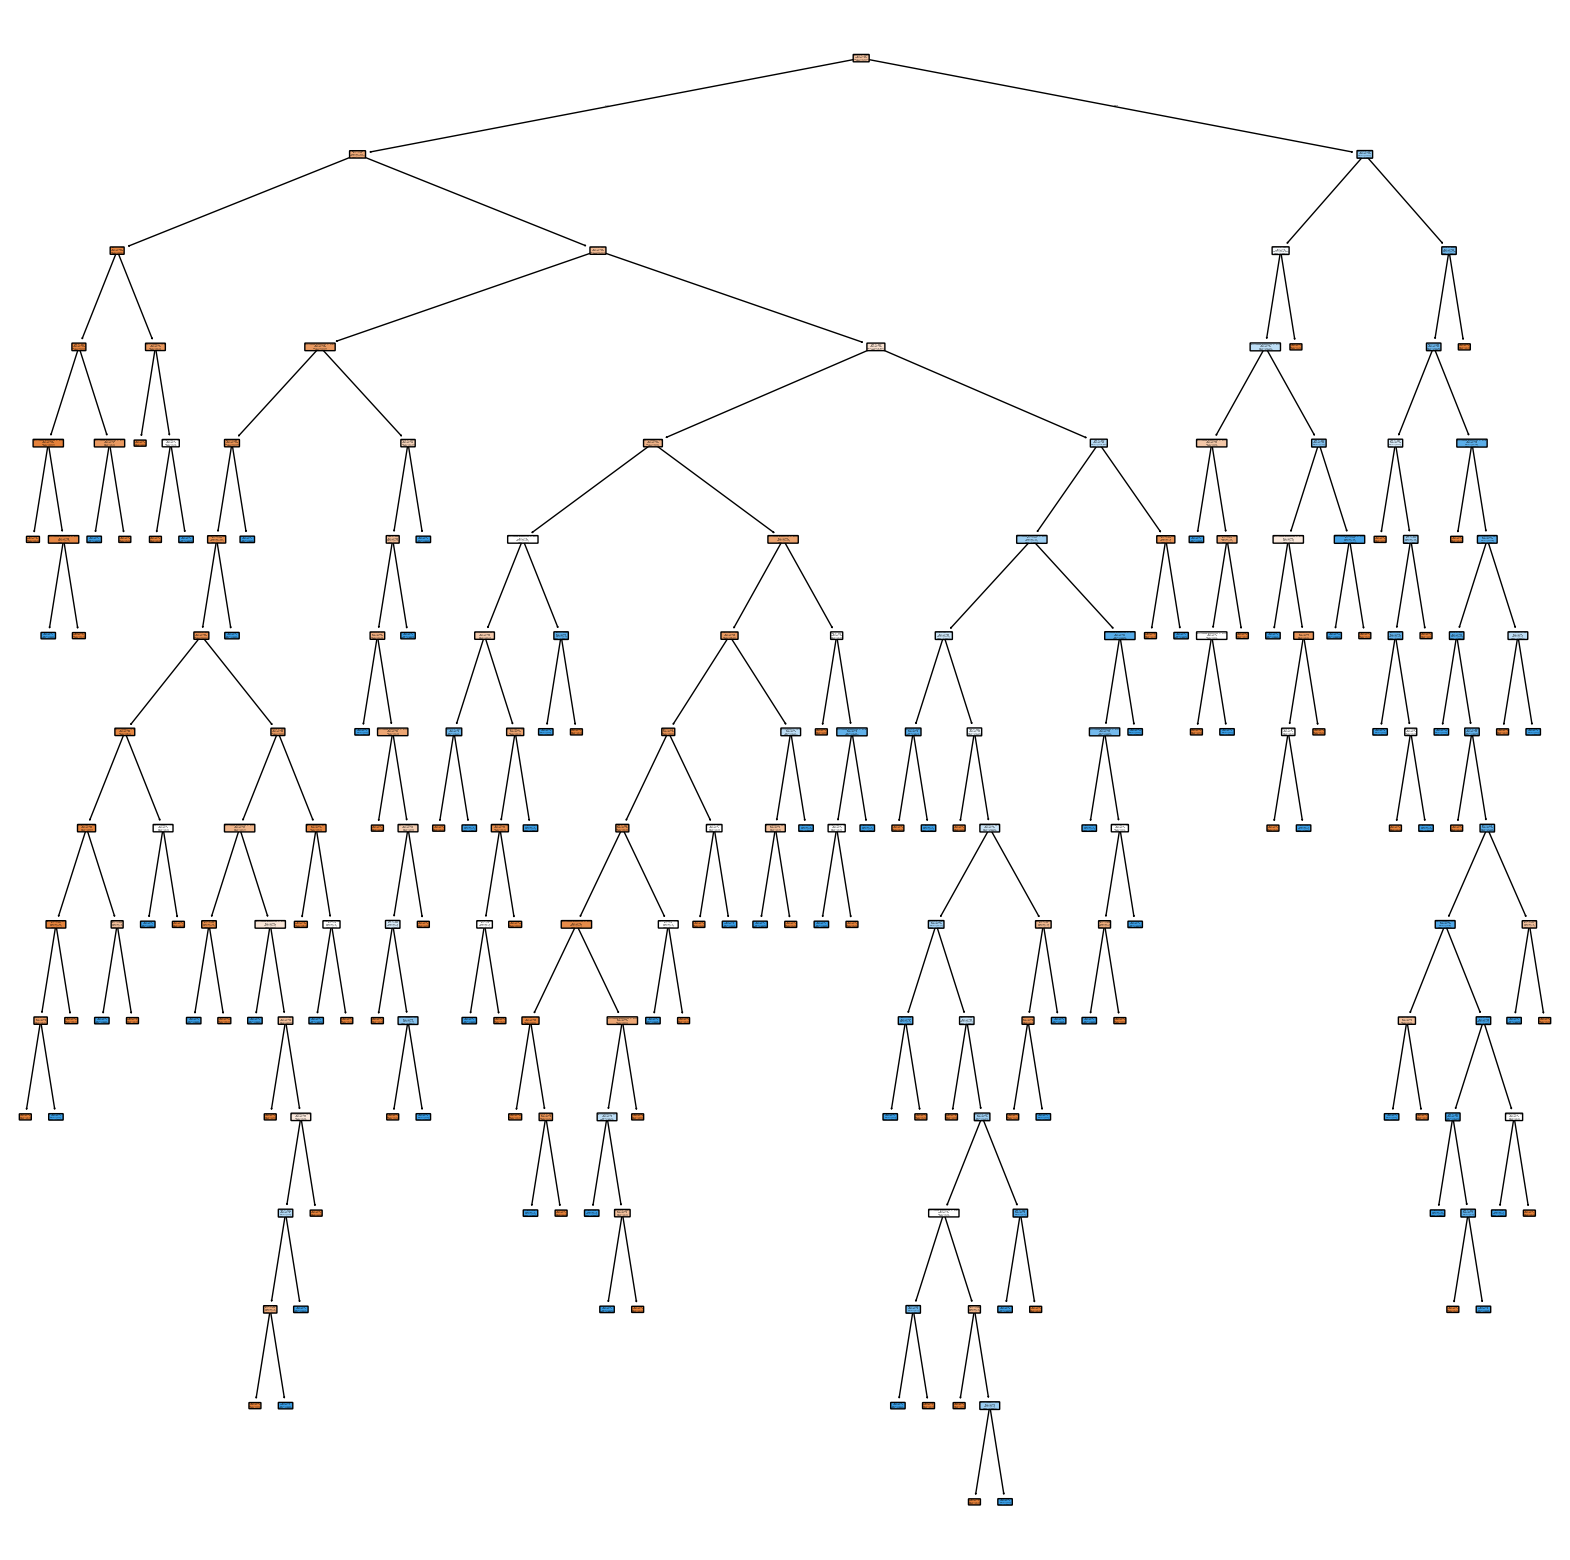

In [ ]:
#Visualizamos el árbol de decisiones
fig = plt.figure(figsize=(20,20))

plot_tree(
    models[0], 
    feature_names = list(X_train_with_outliers_sel.columns), 
    class_names = ["Sano", "Diabetes"], 
    filled = True, 
    rounded = True)

plt.show()

# Decision Tree - Optimization

In [ ]:
hyperparams = {
    "criterion" : ['gini', "entropy"], 
    "splitter" : ['best', "random"], 
    "max_depth" : [None, 5, 10, 15, 20, 25], 
    "min_samples_split" : [2, 5, 10, 15], 
    "min_samples_leaf" : [1, 2, 4, 6],  
    "max_features" : [None, 3, 5, 7, 9], 
    "max_leaf_nodes" : [None, 10, 15, 20, 30], 
    "min_impurity_decrease" :[0.0, 0.01, 0.001], 
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10, n_jobs = 2)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'max_features': [None, 3, 5, 7, 9],
                         'max_leaf_nodes': [None, 10, 15, 20, 30],
                         'min_impurity_decrease': [0.0, 0.01, 0.001],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid.fit(X_train_with_outliers_sel, y_train)

print(f"The best hyperparameters are: {grid.best_params_}")

The best hyperparameters are: {'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
model = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 1, min_samples_split = 2, max_leaf_nodes = 10, min_impurity_decrease = 0.0, splitter = "best", random_state = 42)
model.fit(X_train_with_outliers_sel, y_train)
y_test_pred = model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

0.7727272727272727


In [ ]:
#dump(model, open("../models/tree_classifier_crit-gini_maxdepth-5_min_leaf-1_min_split-2_max_nodes-10_min_impurity-0_split-best_42.sav", "wb"))

# Boosting

In [ ]:
train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel,
  X_train_with_outliers_norm_sel,
  X_train_without_outliers_norm_sel,
  X_train_with_outliers_minmax_sel,
  X_train_without_outliers_minmax_sel
]
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel,
  X_test_with_outliers_norm_sel,
  X_test_without_outliers_norm_sel,
  X_test_with_outliers_minmax_sel,
  X_test_without_outliers_minmax_sel
]

results = []
models = []

for df_index in range(len(train_dfs)):
  model = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.001)
  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)
  y_train_pred = model.predict(train_df)
  y_test_pred = model.predict(test_dfs[df_index])

  results.append(
    {
        "index": df_index,
        "train_score": accuracy_score(y_train, y_train_pred),
        "test_score": accuracy_score(y_test, y_test_pred)
    }
  )
  models.append(model)
sorted(results, key = lambda x: x["train_score"], reverse = True)

[{'index': 0,
  'train_score': 0.6579804560260586,
  'test_score': 0.6233766233766234},
 {'index': 1,
  'train_score': 0.6579804560260586,
  'test_score': 0.6233766233766234},
 {'index': 2,
  'train_score': 0.6579804560260586,
  'test_score': 0.6233766233766234},
 {'index': 3,
  'train_score': 0.6579804560260586,
  'test_score': 0.6233766233766234},
 {'index': 4,
  'train_score': 0.6579804560260586,
  'test_score': 0.6233766233766234},
 {'index': 5,
  'train_score': 0.6579804560260586,
  'test_score': 0.6233766233766234}]

# Model Optimization - Boosting

In [ ]:
hyperparams = {
    'n_estimators': [50, 100, 200],              
    'max_depth': [3, 5, 7, 10],                   
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      
    'subsample': [0.6, 0.8, 1.0],                
    'colsample_bytree': [0.6, 0.8, 1.0],          
    'min_child_weight': [1, 3, 5],                
    'gamma': [0, 0.1, 0.2, 0.3],                 
    'reg_alpha': [0, 0.01, 0.1, 1],               
    'reg_lambda': [0, 0.01, 0.1, 1], 
}

model = XGBClassifier()
grid = GridSearchCV(
    model,
    hyperparams,
    scoring='accuracy',
    cv=20,
    n_jobs=2,
)

grid.fit(X_train_with_outliers_sel, y_train)
print("The best hyperparameters are:", random_search.best_params_)
print("The best accuracy is:", random_search.best_score_)

In [ ]:
hyperparams = {
    'n_estimators': [50, 100, 200],              
    'max_depth': [3, 5, 7, 10],                   
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      
    'subsample': [0.6, 0.8, 1.0],                
    'colsample_bytree': [0.6, 0.8, 1.0],          
    'min_child_weight': [1, 3, 5],                
    'gamma': [0, 0.1, 0.2, 0.3],                 
    'reg_alpha': [0, 0.01, 0.1, 1],               
    'reg_lambda': [0, 0.01, 0.1, 1], 
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10, n_jobs=2)
grid

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.00...
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=2,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.01, 0.1, 1],
                         'reg_lambda': [0, 0.01, 0.1, 1],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [ ]:
grid.fit(X_train_with_outliers_sel, y_train)
print(f"The best hyperparameters are: {grid.best_params_}")

KeyboardInterrupt: 

In [ ]:
model = XGBClassifier(n_estimators = 200, learning_rate = 0.03, max_depth = 5, gamma = 2, min_child_weight = 1, random_state = 42)
model.fit(X_train_with_outliers_sel, y_train)
y_test_pred = best_model.predict(X_test_with_outliers_sel)
print(accuracy_score(y_test, y_test_pred))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
#dump(model, open("../models/boosting_n_est-200_learn_rat-0.03_max_dep-5_gam-2_min_child-142.sav", "wb"))